
# Departamento de marketing
Dados: https://www.kaggle.com/arjunbhasin2013/ccdata
# Importação das bibliotecas e base de dados

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [2]:
creditcard_df = pd.read_csv('Data_base/CC GENERAL.csv')
creditcard_df

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


Este caso requer o desenvolvimento de uma segmentação de clientes para definir a estratégia de marketing. O
conjunto de dados de amostra resume o comportamento de uso de cerca de 9.000 portadores de cartão de crédito ativos durante os últimos 6 meses. O arquivo está no nível do cliente com 18 variáveis ​​comportamentais.

# A seguir está o conjunto de dados do Dicionário de Dados para Cartão de Crédito: -

CUST ID : Identificação do titular do cartão de crédito (categórico)
SALDO : Valor do saldo restante em sua conta para fazer compras
BALANCEFREQUENCY : Frequência de atualização do saldo, pontuação entre 0 e 1 (1 = atualizado com frequência, 0 = não atualizado com frequência)
COMPRAS : Quantidade de compras feitas a partir da conta COMPRAS
ÚNICAS : Valor máximo de compras feitas de uma só vez
PARCELASCOMPRAS : Quantidade de compras feitas a prazo
CASH ADVANCE : Dinheiro adiantado dado pelo usuário
FREQUÊNCIA DE COMPRA: Com que frequência as compras estão sendo feitas, pontue entre 0 e 1 (1 = comprado com frequência, 0 = comprado com pouca frequência)
ONEOFFPURCHASESFREQUENCY : Com que frequência as compras estão acontecendo de uma só vez (1 = comprado com frequência, 0 = comprado sem frequência)
PURCHASESINSTALLMENTSFREQUENCY : Com que frequência as compras parceladas estão sendo feitas (1 = feito com frequência, 0 = feito com pouca frequência)
CASHADVANCEFREQUENCY : Com que frequência o pagamento antecipado está sendo pago
CASHADVANCETRX : Número de transações feitas com "Dinheiro Adiantado"
COMPRAS TRX : Número de transações de compra feito
CREDITLIMIT : Limite do Cartão de Crédito para
PAGAMENTOS do usuário: Valor do pagamento feito pelo usuário
MINIMUM_PAYMENTS : Valor mínimo dos pagamentos feitos pelo usuário
PRCFULLPAYMENT : Percentual do pagamento integral pago pelo usuário
TENURE : Tempo de serviço do cartão de crédito para o usuário

In [3]:
creditcard_df.shape

(8950, 18)

In [4]:
creditcard_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [5]:
creditcard_df.isnull()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
8946,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
8947,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
8948,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [6]:
creditcard_df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [7]:
creditcard_df[creditcard_df['ONEOFF_PURCHASES']==40761.250000]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
550,C10574,11547.52001,1.0,49039.57,40761.25,8278.32,558.166886,1.0,1.0,0.916667,0.083333,1,101,22500.0,46930.59824,2974.069421,0.25,12


In [8]:
creditcard_df[creditcard_df['CASH_ADVANCE'] == 47137.211760]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
2159,C12226,10905.05381,1.0,431.93,133.5,298.43,47137.21176,0.583333,0.25,0.5,1.0,123,21,19600.0,39048.59762,5394.173671,0.0,12


# Visualização e Exploração do dados

<AxesSubplot:>

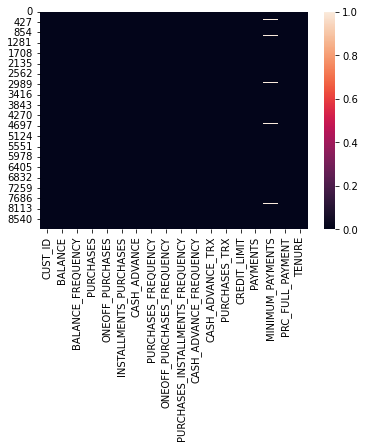

In [9]:
# Criar uma visualização de dados Nulos. No formato de mapa de calor
sns.heatmap(creditcard_df.isnull())

In [10]:
# Criar contagem de dados nulos nas colunas
creditcard_df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

# tratamento de valores nulos com a média

In [11]:
# Verificando a média MINIMUM_PAYMENTS
creditcard_df['MINIMUM_PAYMENTS'].mean()

864.2065423050828

In [12]:
creditcard_df.loc[(creditcard_df['MINIMUM_PAYMENTS'].isnull()== True),
'MINIMUM_PAYMENTS'] = creditcard_df['MINIMUM_PAYMENTS'].mean()

In [13]:
# Verificando a média CREDIT_LIMIT
creditcard_df['CREDIT_LIMIT'].mean()

4494.449450364621

In [14]:
creditcard_df.loc[(creditcard_df['CREDIT_LIMIT'].isnull()== True),
'CREDIT_LIMIT'] = creditcard_df['CREDIT_LIMIT'].mean()

In [15]:
# Criar contagem de dados nulos nas colunas
creditcard_df.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

<AxesSubplot:>

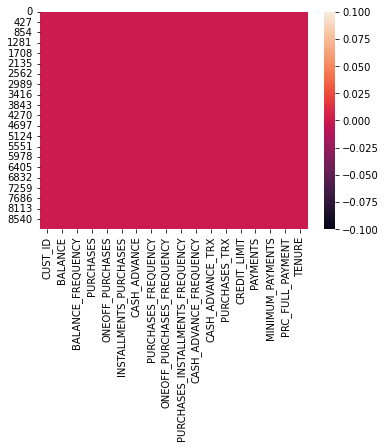

In [16]:
# Criar uma visualização de dados Nulos. No formato de mapa de calor
sns.heatmap(creditcard_df.isnull())

In [17]:
# Verificar registros duplicados da base de dados.
creditcard_df.duplicated().sum()

0

In [18]:
# A coluna CUST_ID não interessa para a análise de dados, e por isso, sera apagada.
creditcard_df.drop('CUST_ID', axis=1 , inplace= True)
creditcard_df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [19]:
# checando as colunas
creditcard_df.columns , len(creditcard_df.columns)

(Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
        'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
        'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
        'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
        'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
        'TENURE'],
       dtype='object'),
 17)

C:\Users\junio\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\junio\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\junio\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either 

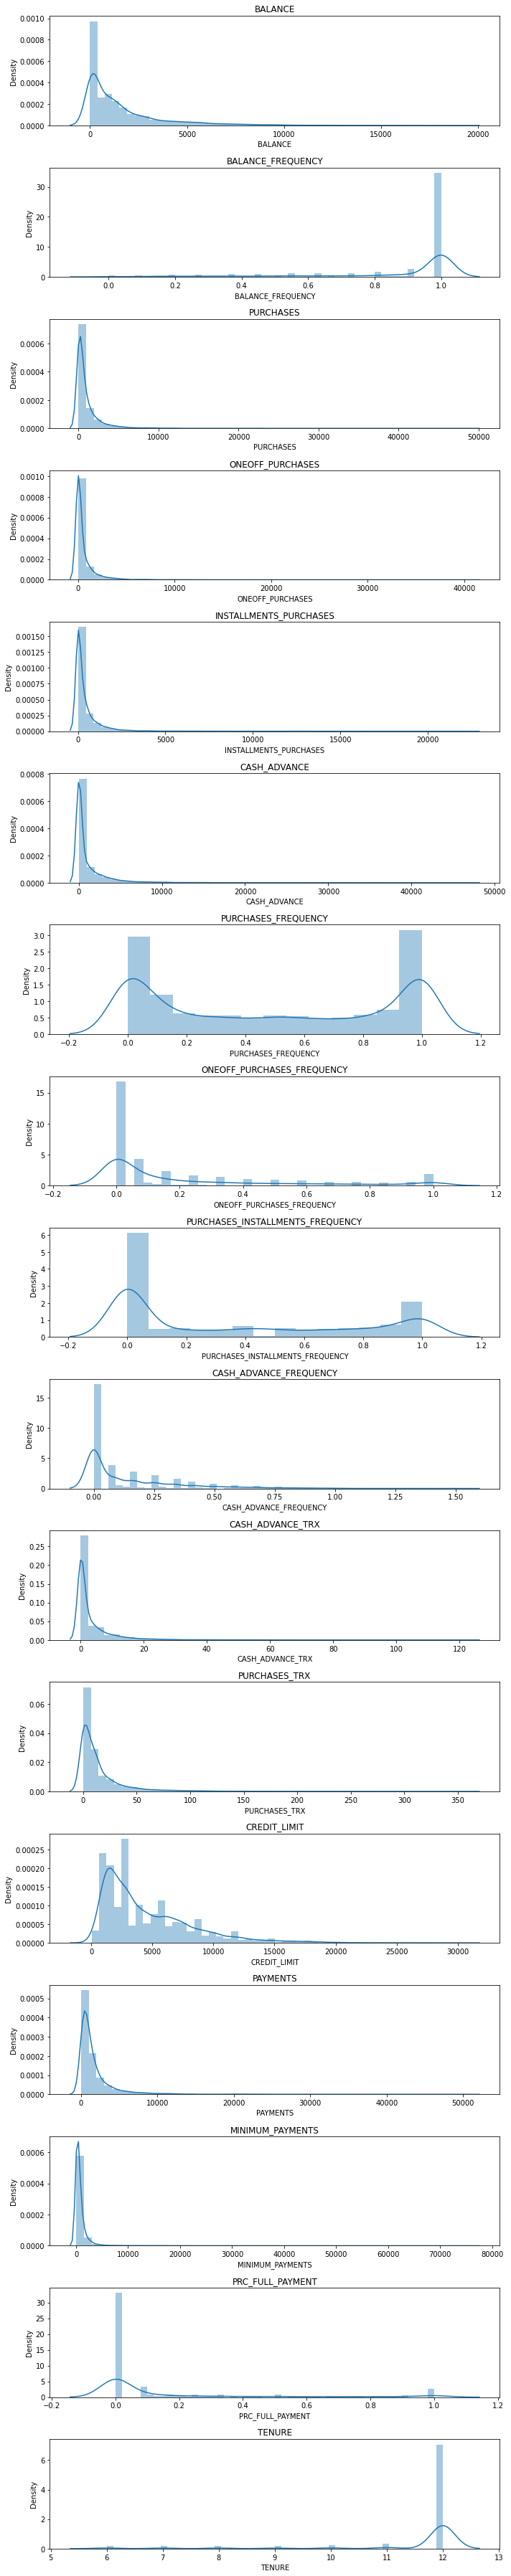

In [20]:
# Cria uma gráfico para cada coluno no formato de histograma
plt.figure(figsize=(10,50))
for i in range(len(creditcard_df.columns)):
    plt.subplot(17, 1, i + 1)
    sns.distplot(creditcard_df[creditcard_df.columns[i]], kde= True)
    plt.title(creditcard_df.columns[i])
plt.tight_layout();

<AxesSubplot:>

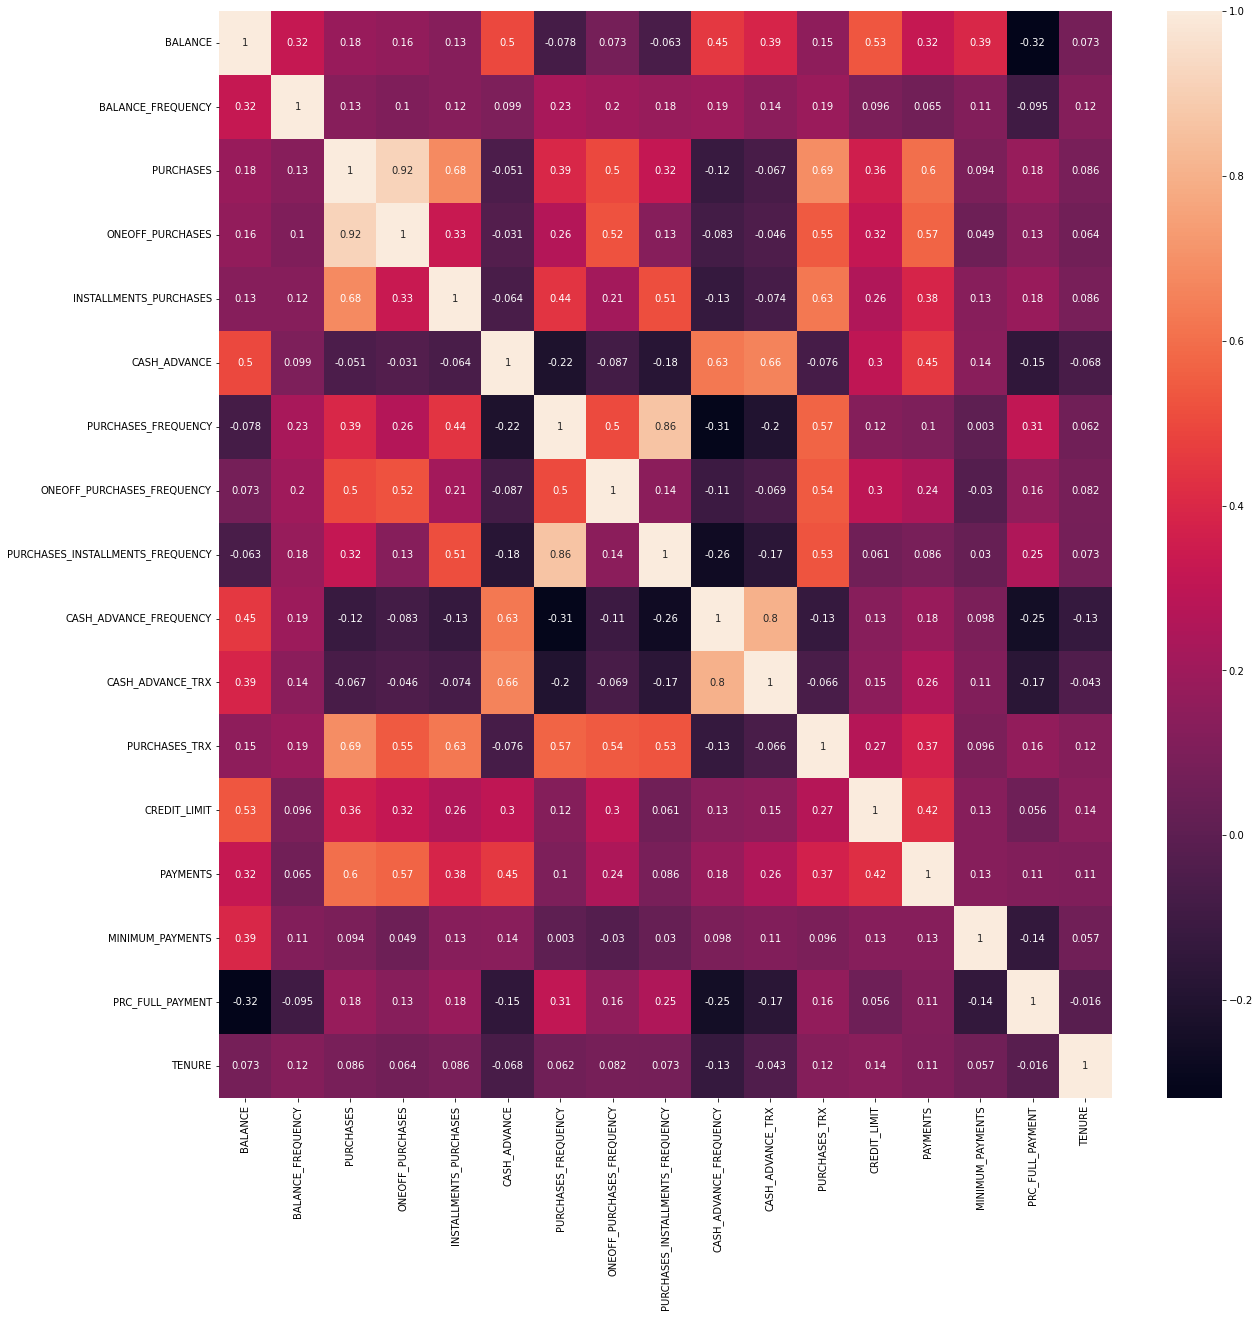

In [21]:
# Criar matriz de correlação
correlations = creditcard_df.corr()
f , ax = plt.subplots(figsize=(20,20))
sns.heatmap(correlations, annot=True)

# USANDO METODO K-MEANS PARA CIRAR GRUPOS/AGRUPAMENTOS

In [22]:
# BUSCANDO VALORES "MIN" E "MAX" DA COLUNA "BALANCE"
min(creditcard_df["BALANCE"]), max(creditcard_df["BALANCE"])

(0.0, 19043.13856)

In [23]:
# OS VALORES DO DATA FRAME ESTÃO DESBALANCEADOS. 
# USANDO O METODO STANDARDSCALER() PARA CRIAR UM BALANCEAMENTO DOS VALORES
scaler = StandardScaler()
creditcard_df_scalerd = scaler.fit_transform(creditcard_df)

In [24]:
# VERIFICAR OS VALORES DEPOIS DO BALANCEAMENTO
creditcard_df_scalerd

array([[-0.73198937, -0.24943448, -0.42489974, ..., -0.31096755,
        -0.52555097,  0.36067954],
       [ 0.78696085,  0.13432467, -0.46955188, ...,  0.08931021,
         0.2342269 ,  0.36067954],
       [ 0.44713513,  0.51808382, -0.10766823, ..., -0.10166318,
        -0.52555097,  0.36067954],
       ...,
       [-0.7403981 , -0.18547673, -0.40196519, ..., -0.33546549,
         0.32919999, -4.12276757],
       [-0.74517423, -0.18547673, -0.46955188, ..., -0.34690648,
         0.32919999, -4.12276757],
       [-0.57257511, -0.88903307,  0.04214581, ..., -0.33294642,
        -0.52555097, -4.12276757]])

In [25]:
# CRIAR UM TESTE DE CLUSTERs PARA VERIFICAR O NÚMERO IDEAL DE GRUPOS(CLUSTER). WCSS
wcss_1 = [] # Varieval que vai recer os valores para cada quantidade de grupos.
range_values = range(1,20) # Variavel que indicar a quantidade de grupos.
for i in range_values: # loop que vai percorrer os valores da variavel range_values => de 1 a 20.as_integer_ratio
    kmeans = KMeans(n_clusters=i) # A variavel vai receber a quantidade de grupos.
    kmeans.fit(creditcard_df_scalerd) # Ajustando os grupos de acordo com a quantidade de Clusters
    wcss_1.append(kmeans.inertia_) # Adicionando valores Obtidos com os testes em uma lista.

# K-Means é um disponível de clusterização (ou agrupamento) Scikit-Learn.
É um aprendizado não supervisionado (ou seja, que não precisa de entradas de confirmação externa) que avalia e agrupa os dados de acordo com suas características, como por exemplo:
lojas/centro logistico
clientes/produtos ou serviços semelhantes
clientes/características semelhantes
séries/gênero da série ou faixa etaria
usuários de uma rede social/usuário influenciador
paciente/sintoma ou característica semelhante
Por exemplo, se eu tenho uma rede de lojas com abrangência nacional, qual seria os melhores lugares para construir os centros logísticos de abastecimento?

In [26]:
# Visualizar os valores Obtidos no processo de agrupamento dfeito com K-means
print(wcss_1)

[152149.99999999994, 127784.87257426504, 111986.69806610131, 99073.93826774825, 91503.39081843375, 84855.79770063519, 79528.43271493998, 74509.46351929128, 69858.34303320386, 66466.45873284465, 63619.224044614464, 61375.765894070755, 59183.90915341144, 57496.40317718343, 55853.87847368658, 54269.10925952003, 53027.31201664639, 51992.600700615825, 50949.16069341375]


Text(0.5, 1.0, 'WCSS')

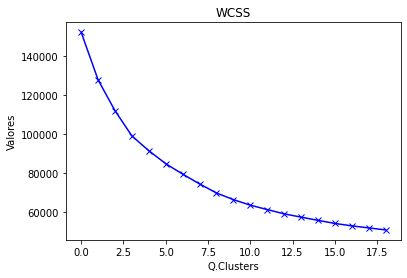

In [28]:
# Criando gráfico com os valores de WCSS
plt.plot(wcss_1, "bx-") # O parametro "bx-" => é usado para colocar uma marcação em x nos pontos de interesse
plt.xlabel("Q.Clusters")
plt.ylabel("Valores")
plt.title("WCSS")

Nesse gráfico dá para ver uma queda de valores para cada aumento na quantidade de clusters.
Os melhores agrupamentos estão entre 7 e 10.

In [29]:
# Criando 8 agrupamentos com K-means
kmeans = KMeans(n_clusters=8)
kmeans.fit(creditcard_df_scalerd)
labels = kmeans.labels_

In [30]:
# Verificar a distribuição dos agrupamentos usando numpy.unique
np.unique(labels,return_counts=True)


(array([0, 1, 2, 3, 4, 5, 6, 7]),
 array([2016, 1096, 2723,  859,  423,  622, 1181,   30], dtype=int64))

In [31]:
# Consultar os centroides que o K-means gerol para os agrupamentos
kmeans.cluster_centers_

array([[-3.64778062e-01,  3.33613299e-01, -3.73814336e-02,
        -2.44338634e-01,  3.60315673e-01, -3.63588884e-01,
         9.90669183e-01, -3.87078511e-01,  1.20608141e+00,
        -4.75237753e-01, -3.61152513e-01,  1.87665863e-01,
        -2.60924517e-01, -2.16885725e-01, -3.26595444e-02,
         3.13849102e-01,  2.57637357e-01],
       [-1.65252838e-01,  3.92195803e-01,  4.53349335e-01,
         5.93166606e-01, -1.79670898e-02, -3.33914190e-01,
         9.43302263e-01,  1.87835741e+00,  8.90139081e-02,
        -4.07665148e-01, -3.23378053e-01,  5.23732101e-01,
         3.73577675e-01,  8.65570027e-02, -1.62605056e-01,
         4.06346562e-01,  2.61047386e-01],
       [ 1.97606805e-02,  4.03533890e-01, -3.61859259e-01,
        -2.46976480e-01, -4.01759306e-01, -8.64811658e-02,
        -8.67754661e-01, -4.10927331e-01, -7.58614032e-01,
         1.15921939e-01, -2.05330787e-02, -4.86896015e-01,
        -3.04946083e-01, -2.48083109e-01, -8.30103301e-03,
        -4.56562606e-01,  2.7

In [32]:
# criar um data frame com os valores do centroides
cluster_centers = pd.DataFrame(data= kmeans.cluster_centers_, columns=[creditcard_df.columns]) # Paranetros: data recebe os dados , e columns recebe os names das colunas.
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.364778,0.333613,-0.037381,-0.244339,0.360316,-0.363589,0.990669,-0.387079,1.206081,-0.475238,-0.361153,0.187666,-0.260925,-0.216886,-0.032660,0.313849,0.257637
1,-0.165253,0.392196,0.453349,0.593167,-0.017967,-0.333914,0.943302,1.878357,0.089014,-0.407665,-0.323378,0.523732,0.373578,0.086557,-0.162605,0.406347,0.261047
2,0.019761,0.403534,-0.361859,-0.246976,-0.401759,-0.086481,-0.867755,-0.410927,-0.758614,0.115922,-0.020533,-0.486896,-0.304946,-0.248083,-0.008301,-0.456563,0.271768
3,1.698325,0.393098,-0.215463,-0.154529,-0.225632,2.025668,-0.471452,-0.210500,-0.409161,1.920837,1.941432,-0.263115,1.040171,0.828342,0.557352,-0.392330,0.071341
4,0.901817,0.466986,2.270963,1.756936,2.141920,-0.195512,1.158629,1.583889,1.226198,-0.312181,-0.212097,2.781452,1.238947,1.290295,0.441655,0.304778,0.334182
5,-0.336050,-0.347078,-0.289267,-0.215966,-0.286835,0.068284,-0.203078,-0.288661,-0.224549,0.308663,0.000996,-0.388117,-0.567159,-0.392680,-0.209145,0.014011,-3.203733
6,-0.701236,-2.142837,-0.311152,-0.235718,-0.302542,-0.322027,-0.556270,-0.444004,-0.440134,-0.520975,-0.376187,-0.419765,-0.177685,-0.202286,-0.256703,0.281130,0.199336
7,1.923051,0.337717,11.212042,10.600367,7.033118,0.419625,1.046983,1.915501,0.981334,-0.258912,0.061229,5.362438,3.044064,8.098975,1.120318,1.110132,0.310863


Os valores estão em escala, pois foi feito um balanceamento dos valores com o metodo STANDARDSCALER()
Para vereficar melhor o resultado dos agrupamentos, deve ser feito uma transformação do dados para os valores de origem.

In [33]:
# O metodo usado para a tranformação reversa é: inverse_tranform(). Deve ser usado o mesmo objeto criado(scaler = StandardScaler()) anteriormente para a tranformação dos dados
cluster_centers = scaler.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(data= cluster_centers, columns=(creditcard_df.columns))
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,805.220083,0.956301,923.338824,186.885283,736.896637,216.408238,0.887954,0.086985,0.843765,0.040044,0.784226,19.374504,3545.099307,1105.280930,788.094852,0.245510,11.862103
1,1220.514994,0.970178,1971.792676,1576.972447,394.820228,278.637458,0.868943,0.762808,0.399814,0.053566,1.042009,27.727854,5853.677875,1983.717894,485.262318,0.272564,11.866667
2,1605.605016,0.972864,230.086948,182.507000,47.761689,797.516068,0.142079,0.079870,0.062945,0.158341,3.108704,2.607418,3384.930836,1014.967560,844.861335,0.020178,11.881014
3,5099.393953,0.970392,542.864477,335.950907,207.031791,5226.790667,0.301134,0.139661,0.201826,0.519523,16.497674,8.169767,8279.016913,4131.114001,2163.092995,0.038965,11.612791
4,3441.530986,0.987896,5855.151608,3508.591111,2347.978936,568.874079,0.955365,0.674962,0.851760,0.072674,1.801418,83.846336,9002.245863,5468.421612,1893.464949,0.242857,11.964539
5,865.015978,0.795051,385.181720,233.977974,151.686061,1122.064941,0.408846,0.116344,0.275196,0.196911,3.255627,5.062701,2430.891398,596.373827,376.802926,0.157813,7.229904
6,104.910273,0.369652,338.424801,201.193870,137.482244,303.564554,0.267092,0.070003,0.189517,0.030892,0.681626,4.276037,3847.958886,1147.546130,265.970216,0.235940,11.784081
7,5567.142164,0.957273,24957.905000,18186.875667,6771.029333,1858.844605,0.910556,0.773889,0.754444,0.083333,3.666667,148.000000,15570.000000,25178.882690,3475.059479,0.478409,11.933333


Os dados dessa tabela(dataframe) são valores correspondente aos centroides de cada agrupamento(mais ou menos a média dos valores).

# Observações que podemos ter vendo esses grupos

Obj.(esses valores podem aparecer diferentes para cada execução dos scripts, pois cada vez que é executado é gerado escalonamentos diferentes para os valores do data frame)


- Grupo 7: (VIP/Prime): limite do cartão alto (15570) e o mais alto percentual de pagamento da fatura completa (0.47). 
> Opção de ação para o Grupo: Aumentar o limite do cartão e o hábito de compras;

- Grupo 6: clientes que pagam poucos juros para o banco e são cuidadosos com seu dinheiro. Possui menos dinheiro na conta-corrente (104) e não sacam muito dinheiro do limite do cartão (302). 23% de pagamento da fatura completa do cartão de crédito;
> Opção de ação para o Grupo: Criar campanhas para o uso do cartão de credito e uso do cartão para saques.

- Grupo 3: usam o cartão de crédito como "empréstimo" (setor mais lucrativo para o banco), possuem muito dinheiro na conta-corrente (5119) e sacam muito dinheiro do cartão de crédito (5246), compram pouco (0.3) e usam bastante o limite do cartão para saques (0.51). Pagam muito pouco a fatura completa (0.03);
> Opção de ação para o Grupo: Criar campanhas de marketing para os clientes pagarem um percentual maior da fatura.

- Grupo 5: (clientes novos): clientes mais novos (7.23) e que mantém pouco dinheiro na conta-corrente (863);
> Opção de ação para o Grupo: Influenciar clientes ao hábito de compras e saques com o cartão.

In [34]:
# Criar um novo data frame com uma nova coluna que informa qual o grupo de cada cliente do banco.
creditcard_df_cluester = pd.concat([creditcard_df,pd.DataFrame({'cluster': labels})],axis= 1)
creditcard_df_cluester

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,2
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,3
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,1
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,2
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6,5
8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,864.206542,0.000000,6,5
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6,5
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6,5


Ao final sera inserido uma nova coluna com os valores correspondentes ao grupo que cada cliente faz porte, com forme foi redado nas etapadas passadas.

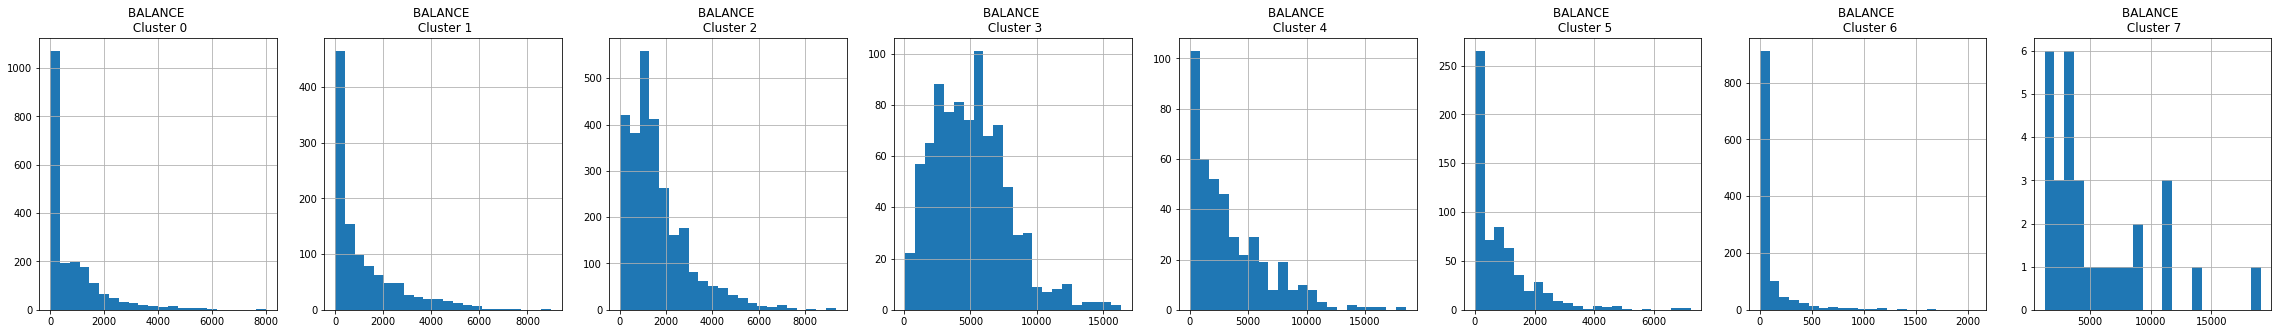

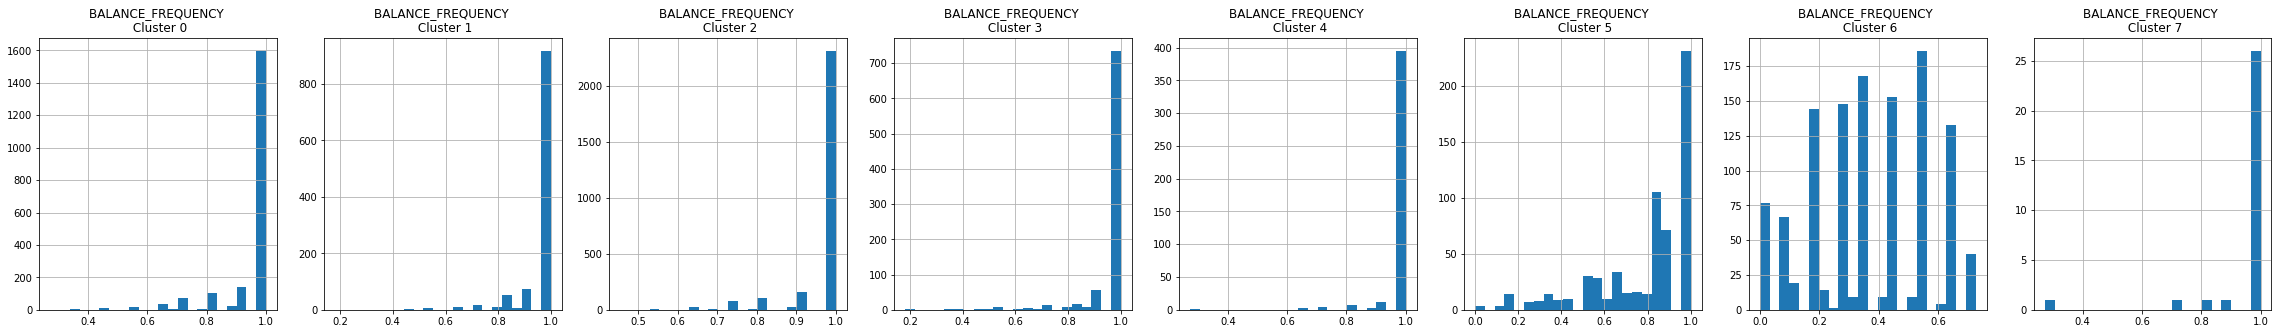

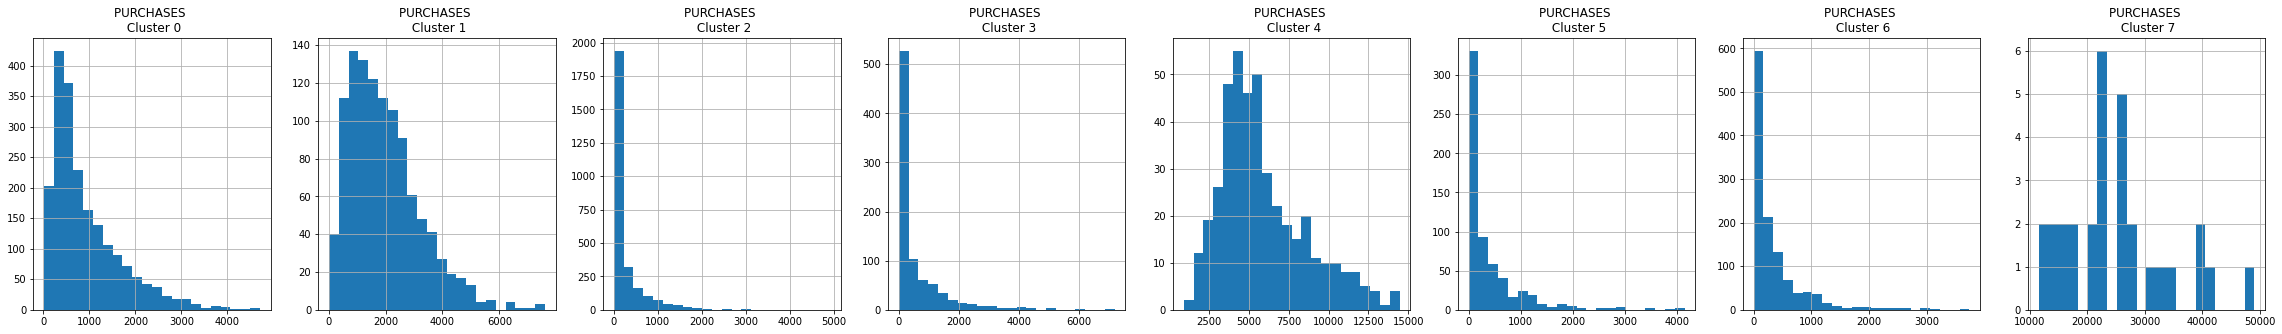

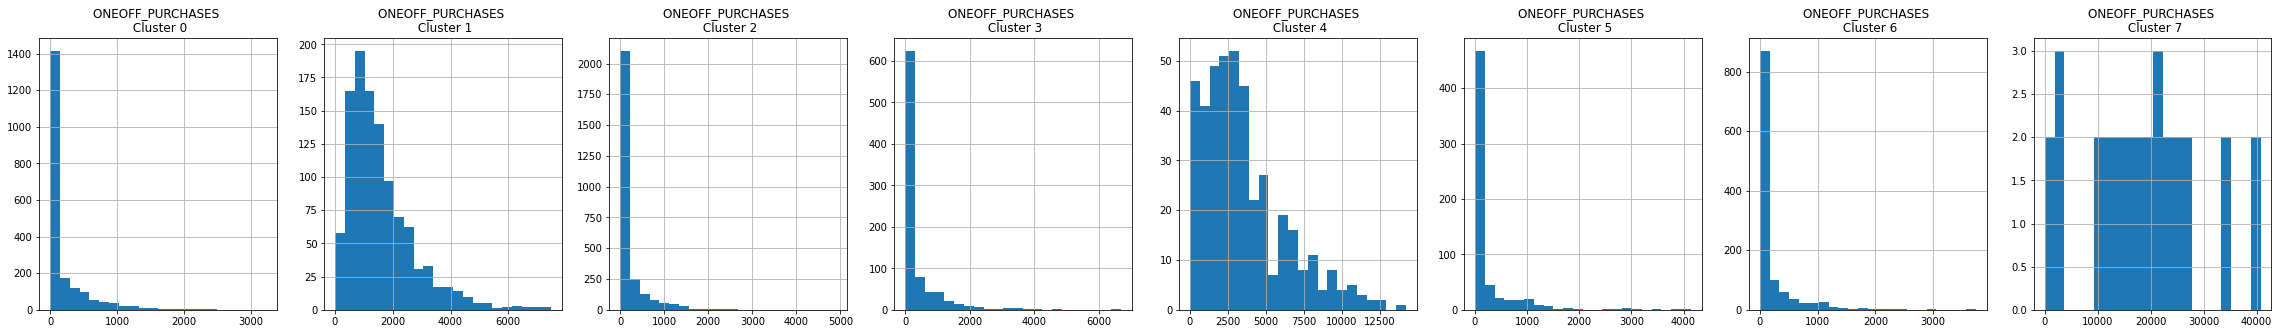

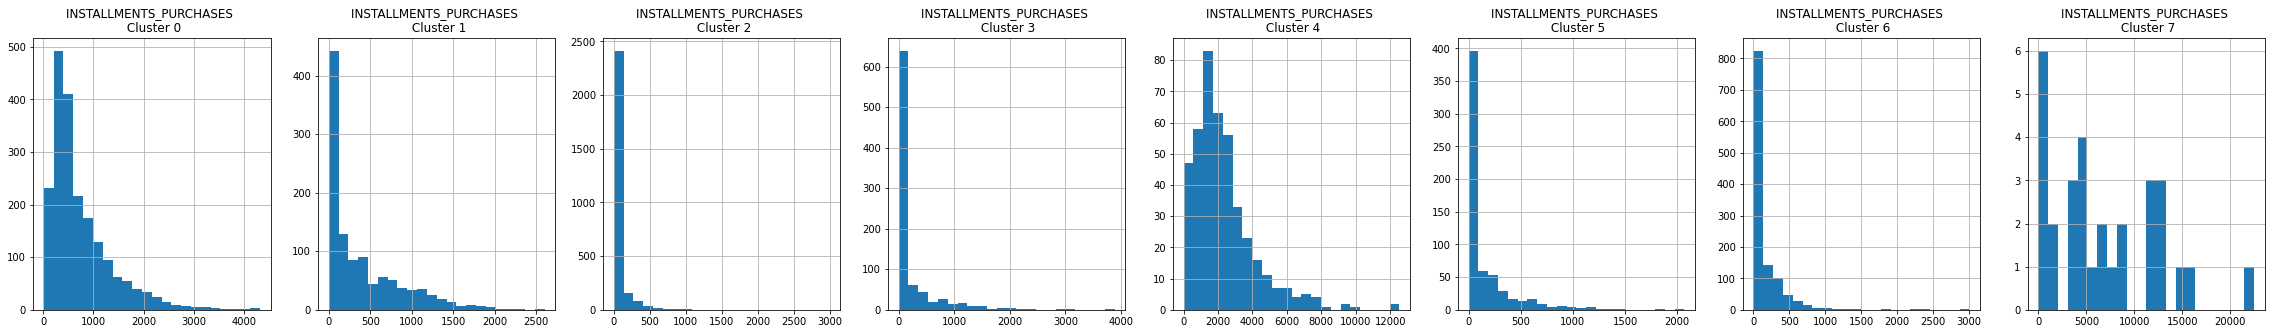

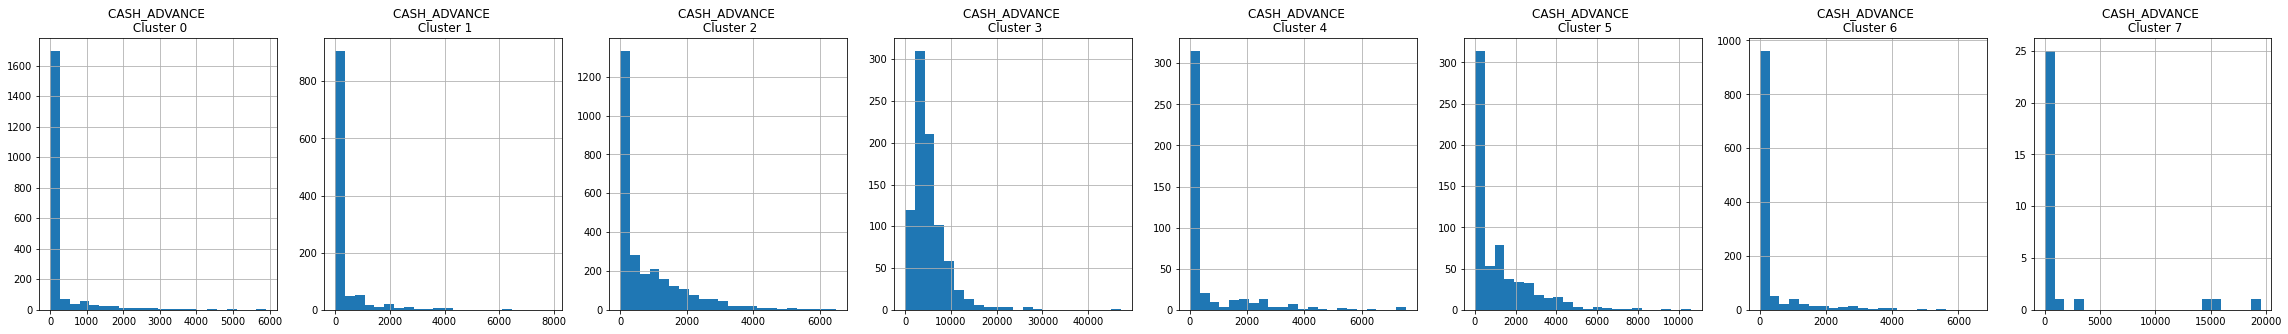

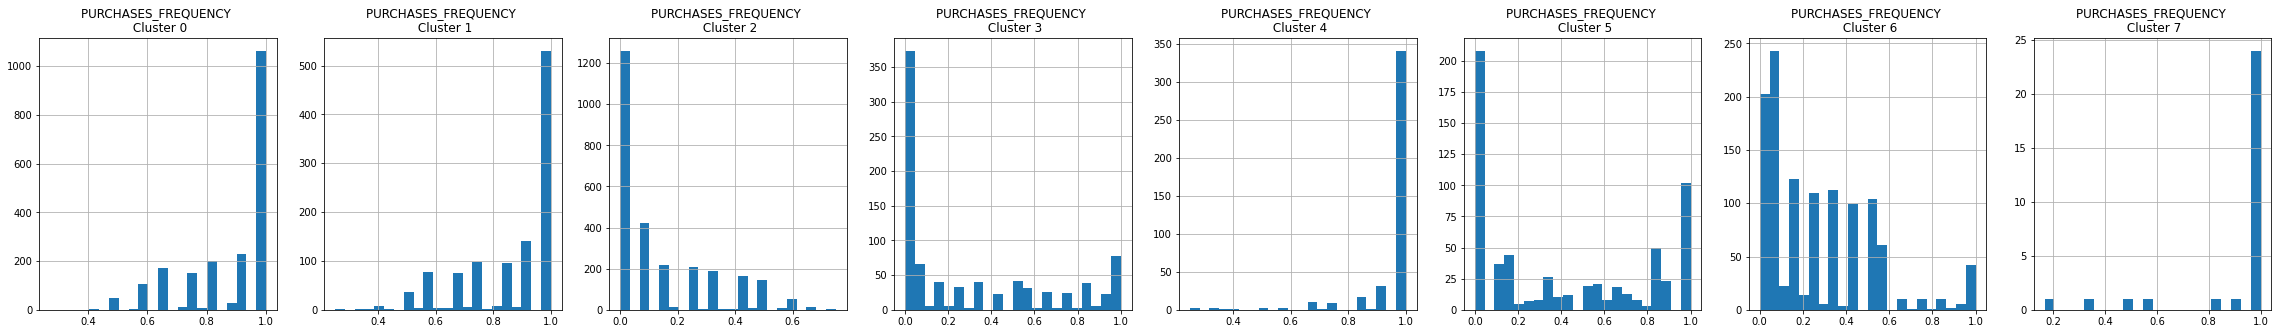

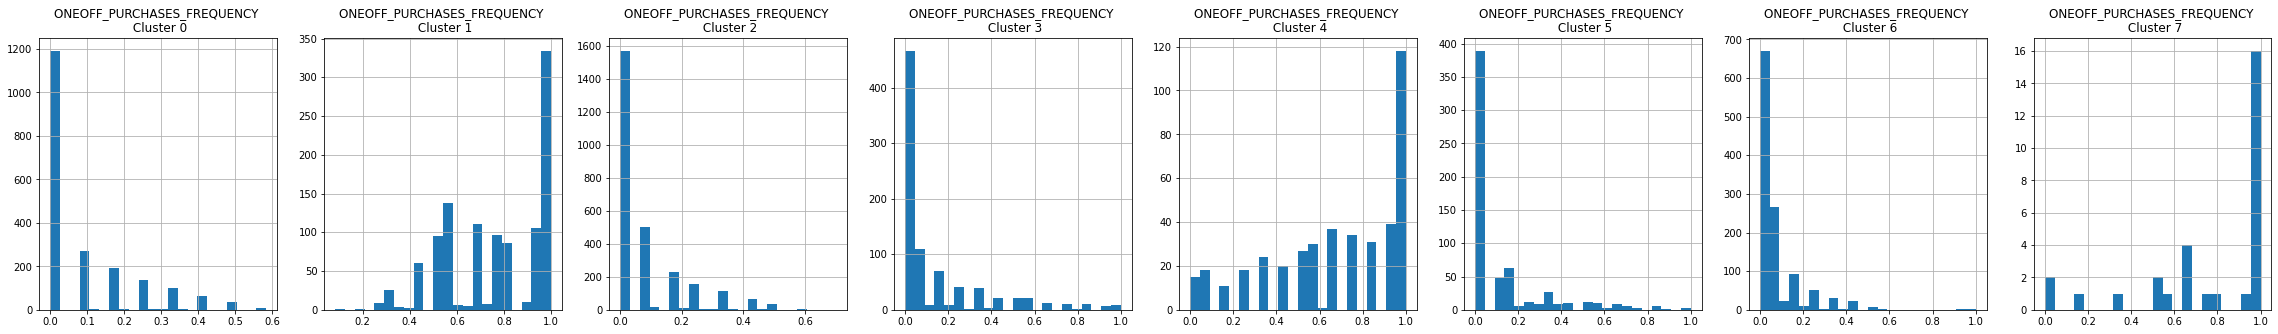

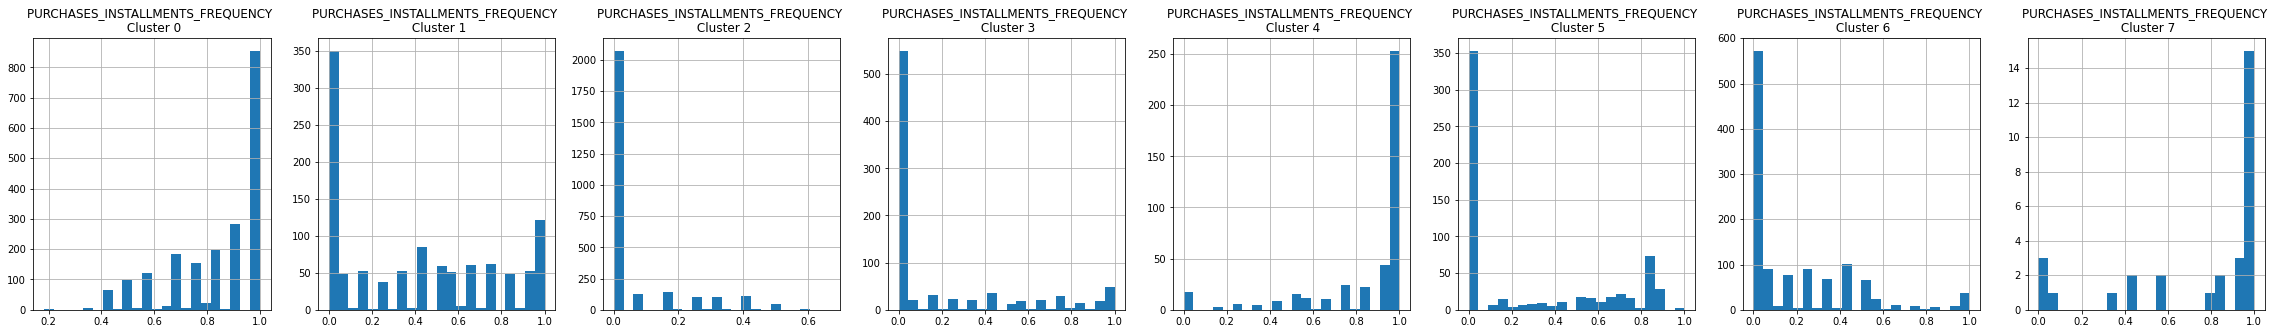

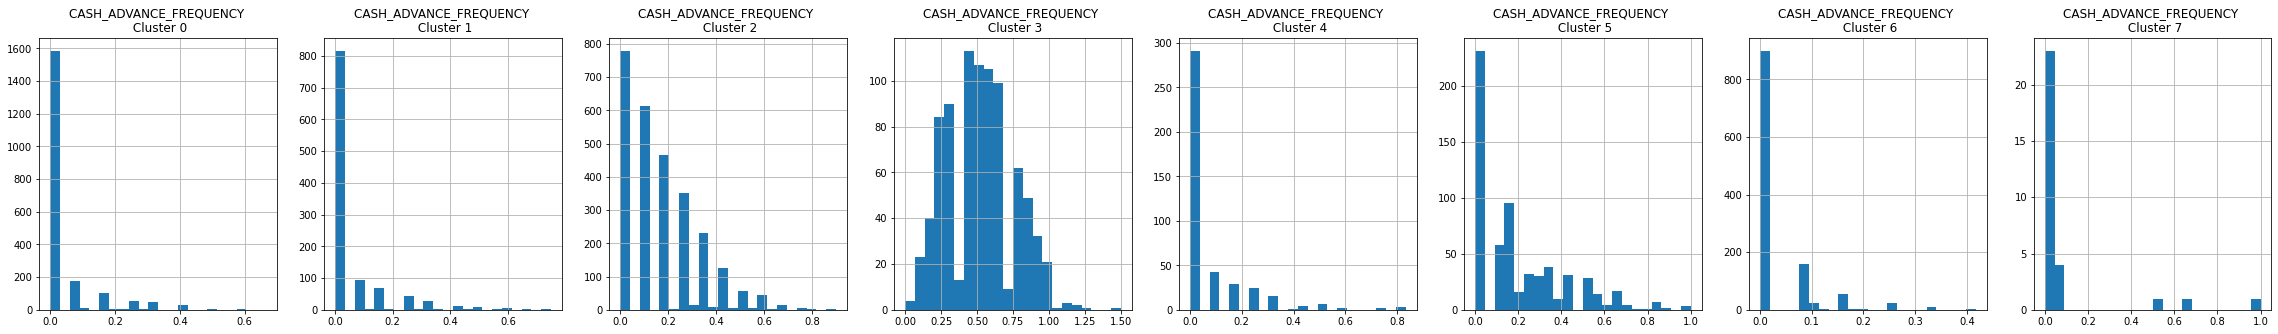

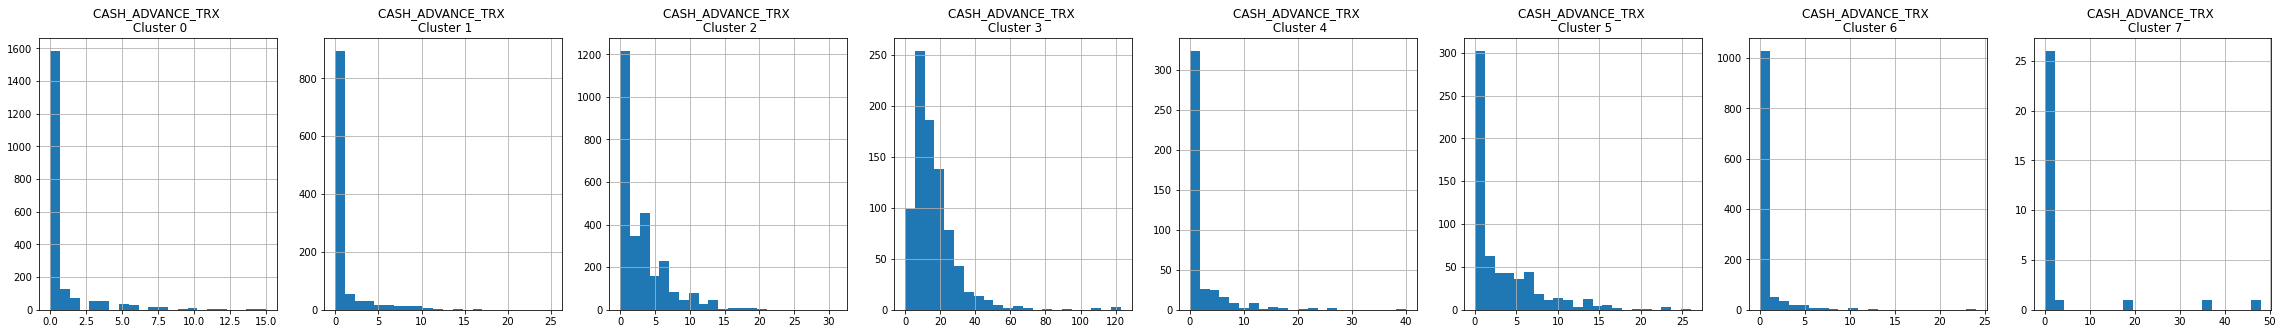

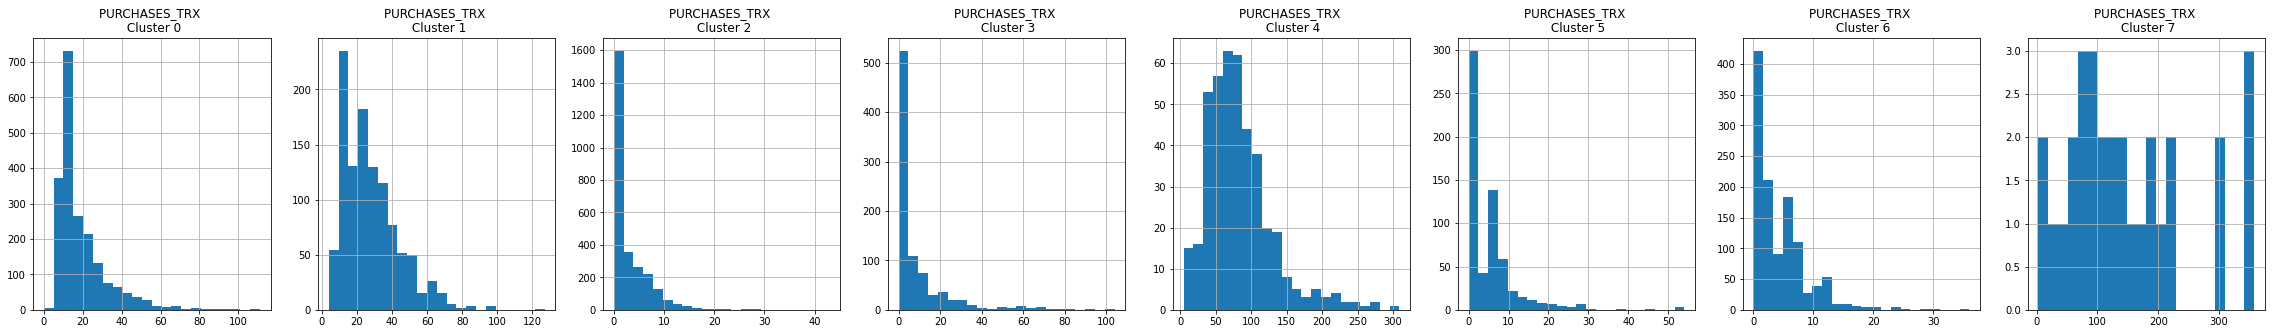

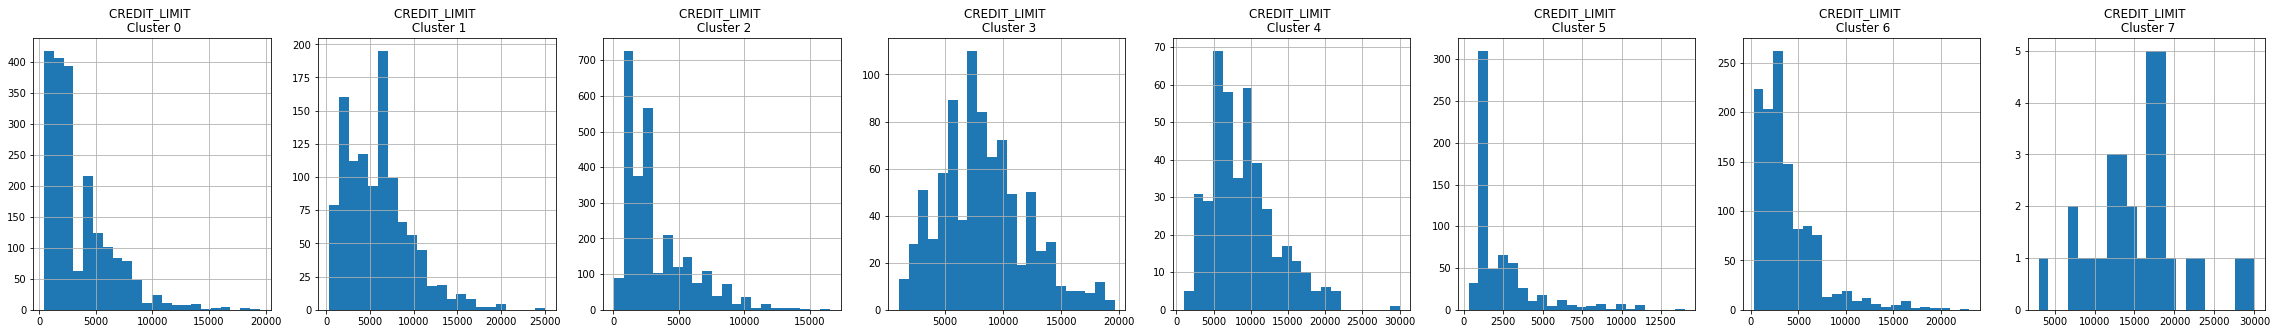

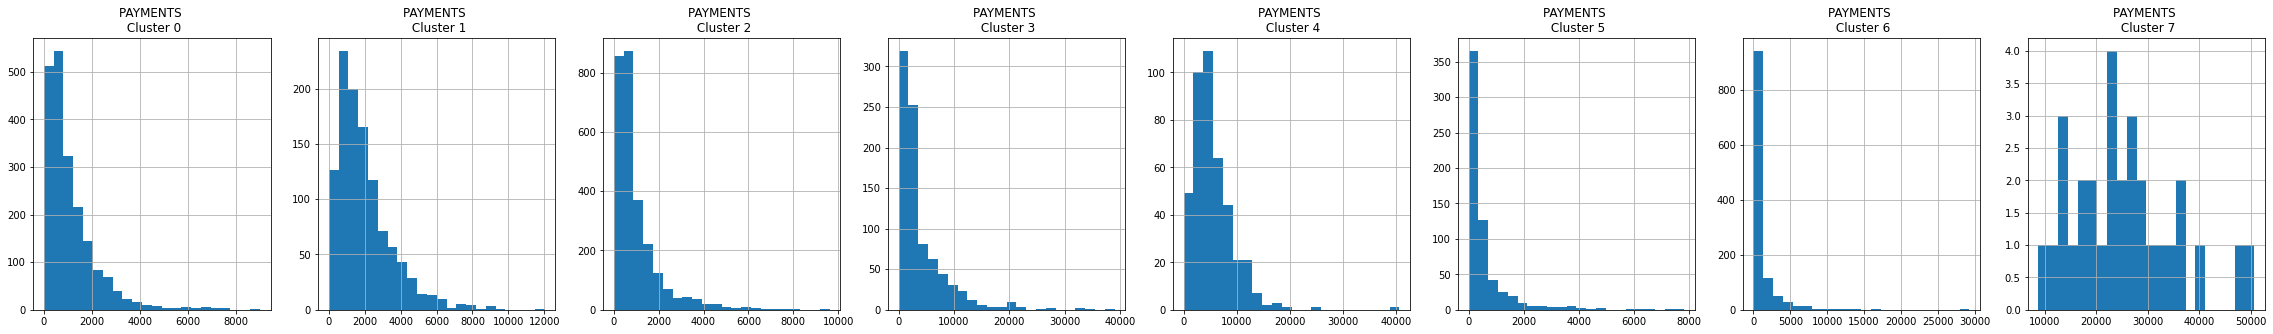

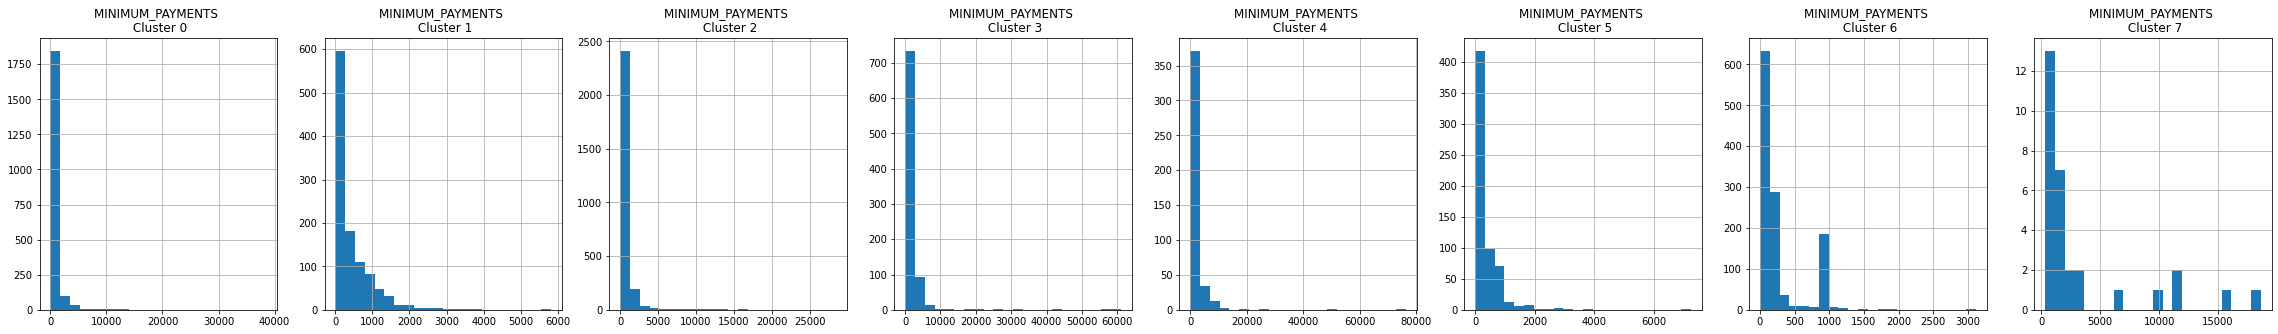

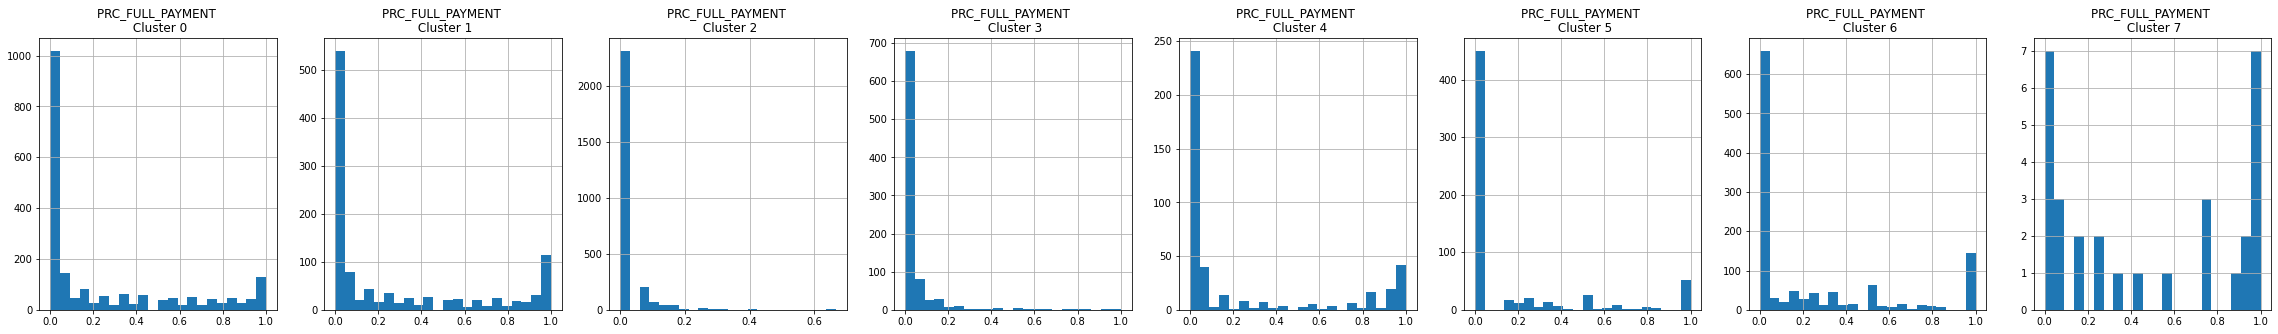

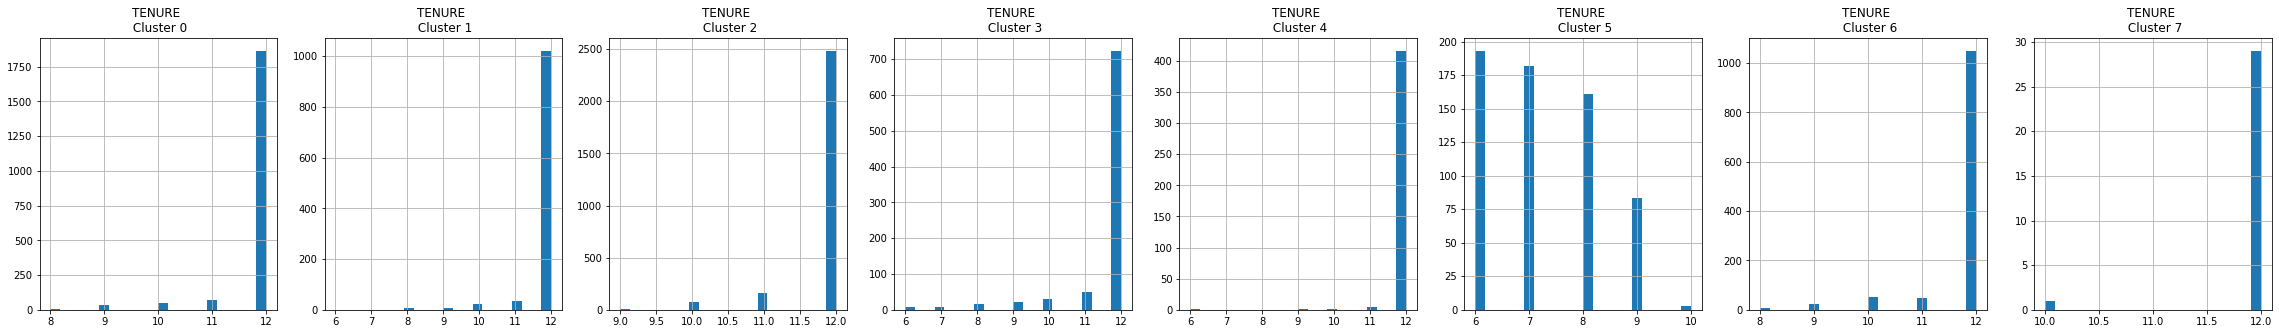

In [39]:
# Criar gráficos para ter uma melhor compreencão dos dados.
for i in creditcard_df.columns: # o laço vai percorrer todas as colunas do data frame
    plt.figure(figsize=(40,5))
    for j in range(8): # o laço vai de 0 a 8 pois é o número de agrupamento que foram criados ...
        plt.subplot(1,8,j+1) # (1,8,j+1) => (Q.Linhas, Q.Colunas, ID)
        cluster = creditcard_df_cluester[creditcard_df_cluester['cluster'] == j] # Filtro para carada rodada do laço ser selecionados só os registro que sejam iguais a J(grupo)
        cluster[i].hist(bins=22) # Gerar um gráfico de histograma de acordo com cada Grupo(j). Parâmetro (bins=) é a quantidade de "barrinhas" que vai aparecer no gráfico.
        plt.title(f"{i} \n Cluster {j}") # Criar um titulo com o nome da Coluna e o Número do grupo.
    plt.show()


# Criar um arquivo no formato CSV, com os dados ordenados por grupo("cluster).

In [41]:
# usando o metodo .sort_values() e passando como paramentro (by= "cluste") é feito a ordenação do data frame de forma crescente de acordo com os valores da coluna "cluster" 
creditcard_ordered = creditcard_df_cluester.sort_values(by="cluster")
creditcard_ordered

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
7587,97.281118,0.818182,3091.75,1456.80,1634.95,0.0,1.000000,0.416667,1.000000,0.0,0,48,3000.0,3424.057988,136.717230,0.636364,12,0
7294,9.048773,0.909091,316.20,0.00,316.20,0.0,1.000000,0.000000,1.000000,0.0,0,24,2000.0,391.398298,89.505939,0.600000,12,0
2768,49.901311,0.727273,790.65,538.01,252.64,0.0,0.750000,0.333333,0.583333,0.0,0,17,4000.0,680.166806,145.251850,0.181818,12,0
5236,27.170790,0.909091,275.00,0.00,275.00,0.0,0.833333,0.000000,0.833333,0.0,0,10,3000.0,299.572759,149.944032,0.800000,12,0
7298,978.771066,1.000000,905.04,545.12,359.92,0.0,0.666667,0.166667,0.666667,0.0,0,20,4000.0,392.482391,315.469998,0.000000,12,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3652,8700.079439,1.000000,20421.59,16864.56,3557.03,0.0,1.000000,1.000000,1.000000,0.0,0,204,17000.0,13002.303930,2746.592199,0.083333,12,7
970,3108.393701,0.900000,26582.34,15158.90,11423.44,0.0,0.900000,0.800000,0.800000,0.0,0,55,28000.0,26557.097240,586.029097,0.875000,10,7
1447,8151.985277,1.000000,25615.07,25122.77,492.30,0.0,1.000000,1.000000,0.583333,0.0,0,56,17000.0,17575.200830,2465.465414,0.166667,12,7
1991,1513.075264,1.000000,15704.04,12618.86,3085.18,0.0,1.000000,0.916667,0.916667,0.0,0,185,3000.0,14399.703180,310.712671,0.916667,12,7


In [42]:
# Criar arquivo CSV com os dados do data frame
# creditcard_ordered.to_csv("creditcar_grupes.csv")

# Aplicação de PCA (principal component analysis) e visualização dos resultados

In [43]:
pca = PCA(n_components=2)
principal_comp = pca.fit_transform(creditcard_df_scalerd)
principal_comp

array([[-1.68221856, -1.07645686],
       [-1.13829059,  2.5064632 ],
       [ 0.96968766, -0.38350805],
       ...,
       [-0.92620393, -1.81078876],
       [-2.336554  , -0.65796791],
       [-0.55642593, -0.40045091]])

In [44]:
pca_df = pd.DataFrame(data = principal_comp, columns=['pca1', 'pca2'])
pca_df.head()

,pca1,pca2
0,-1.682219,-1.076457
1,-1.138291,2.506463
2,0.969688,-0.383508
3,-0.873625,0.043157
4,-1.599433,-0.688585


In [45]:
pca_df = pd.concat([pca_df, pd.DataFrame({'cluster': labels})], axis = 1)
pca_df.head()

,pca1,pca2,cluster
0,-1.682219,-1.076457,2
1,-1.138291,2.506463,3
2,0.969688,-0.383508,1
3,-0.873625,0.043157,2
4,-1.599433,-0.688585,2


<AxesSubplot:xlabel='pca1', ylabel='pca2'>

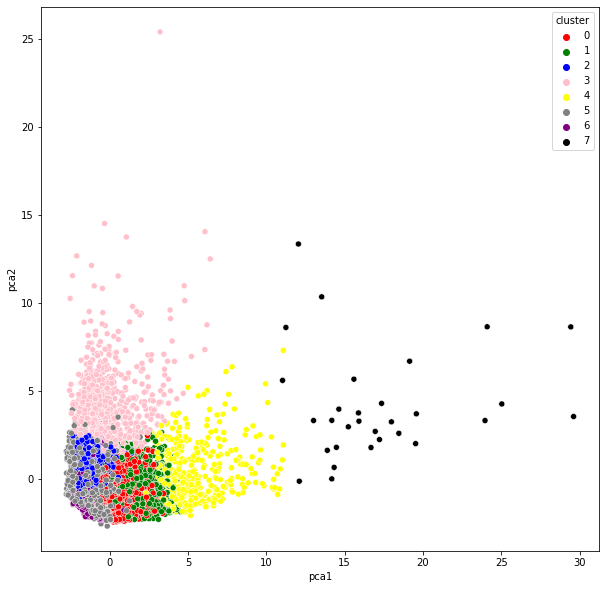

In [46]:
plt.figure(figsize=(10,10))
sns.scatterplot(x = 'pca1', y = 'pca2', hue = 'cluster', data = pca_df, palette = ['red', 'green', 'blue', 'pink', 'yellow', 'gray', 'purple', 'black'])

# Aplicação de autoencoders

In [47]:
creditcard_df_scalerd.shape

(8950, 17)

In [49]:
# 17 -> 500 -> 2000 -> 10 -> 2000 -> 500 ->17
# sera feito uma redução dos dados com a ajudade de rede deural
# Importar as blibliotecas:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

In [50]:
input_df = Input(shape=(17,))
x = Dense(500, activation='relu')(input_df)
x = Dense(2000, activation='relu')(x)

encoded = Dense(10, activation='relu')(x)

x = Dense(2000, activation='relu')(encoded)
x = Dense(500, activation='relu')(x)

decoded = Dense(17)(x)

In [51]:
# autoencoder
autoencoder = Model(input_df, decoded)

# encoder
encoder = Model(input_df, encoded)

In [52]:
# autoencoder
autoencoder.compile(optimizer = 'Adam', loss = 'mean_squared_error')

In [53]:
# Treinamento do autoEncoder
autoencoder.fit(creditcard_df_scalerd, creditcard_df_scalerd, epochs = 50)

Epoch 1/50
280/280 [==============================] - 2s 7ms/step - loss: 0.1997
Epoch 2/50
280/280 [==============================] - 2s 7ms/step - loss: 0.0787
Epoch 3/50
280/280 [==============================] - 2s 7ms/step - loss: 0.0949
Epoch 4/50
280/280 [==============================] - 2s 7ms/step - loss: 0.0703
Epoch 5/50
280/280 [==============================] - 2s 7ms/step - loss: 0.0444
Epoch 6/50
280/280 [==============================] - 2s 7ms/step - loss: 0.0360
Epoch 7/50
280/280 [==============================] - 2s 7ms/step - loss: 0.0290
Epoch 8/50
280/280 [==============================] - 2s 7ms/step - loss: 0.0293
Epoch 9/50
280/280 [==============================] - 2s 7ms/step - loss: 0.0387
Epoch 10/50
280/280 [==============================] - 2s 7ms/step - loss: 0.0592
Epoch 11/50
280/280 [==============================] - 2s 7ms/step - loss: 0.0897
Epoch 12/50
280/280 [==============================] - 2s 7ms/step - loss: 0.0481
Epoch 13/50
280/280 [====

In [54]:
creditcard_df_scalerd.shape

(8950, 17)

In [55]:
compact = encoder.predict(creditcard_df_scalerd)

In [56]:
compact.shape

(8950, 10)

In [57]:
creditcard_df_scalerd[0]

array([-0.73198937, -0.24943448, -0.42489974, -0.35693402, -0.34907882,
       -0.46678555, -0.80649035, -0.67866081, -0.70731317, -0.67534886,
       -0.47606982, -0.51133325, -0.96043334, -0.52897879, -0.31096755,
       -0.52555097,  0.36067954])

In [58]:
compact[0]

array([0.        , 0.4004464 , 0.10328371, 0.07576924, 0.        ,
       0.17944992, 0.18823212, 0.38617694, 0.        , 0.28205273],
      dtype=float32)

In [59]:
wcss_2 = []
range_values = range(1, 20)
for i in range_values:
  kmeans = KMeans(n_clusters=i)
  kmeans.fit(compact)
  wcss_2.append(kmeans.inertia_)

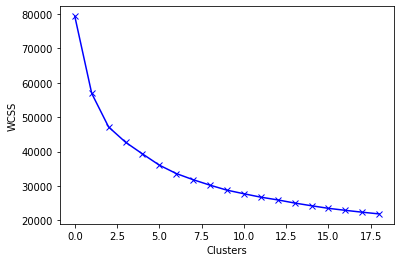

In [60]:
plt.plot(wcss_2, 'bx-')
plt.xlabel('Clusters')
plt.ylabel('WCSS');

C:\Users\junio\AppData\Local\Temp\ipykernel_7956\4028994289.py:1: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bx-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(wcss_1, 'bx-', color = 'r')
C:\Users\junio\AppData\Local\Temp\ipykernel_7956\4028994289.py:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bx-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(wcss_2, 'bx-', color = 'g')


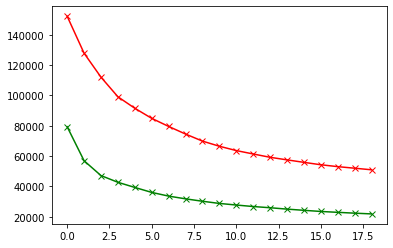

In [71]:
plt.plot(wcss_1, 'bx-', color = 'r')
plt.plot(wcss_2, 'bx-', color = 'g')

In [62]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(compact)

KMeans(n_clusters=4)

In [63]:
labels = kmeans.labels_
labels, labels.shape

(array([1, 3, 3, ..., 3, 3, 3]), (8950,))

In [64]:
df_cluster_at = pd.concat([creditcard_df, pd.DataFrame({'cluster': labels})], axis = 1)
df_cluster_at.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,1
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,3
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,3
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,1
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,1


In [65]:
pca = PCA(n_components = 2)
prin_comp = pca.fit_transform(compact)
pca_df = pd.DataFrame(data = prin_comp, columns = ['pca1', 'pca2'])
pca_df.head()

,pca1,pca2
0,-1.968297,-0.169343
1,0.441768,1.360018
2,-0.167124,-0.403341
3,-1.018287,-0.188855
4,-1.780452,-0.195974


In [66]:
pca_df = pd.concat([pca_df, pd.DataFrame({'cluster': labels})], axis = 1)
pca_df.head()

,pca1,pca2,cluster
0,-1.968297,-0.169343,1
1,0.441768,1.360018,3
2,-0.167124,-0.403341,3
3,-1.018287,-0.188855,1
4,-1.780452,-0.195974,1


<AxesSubplot:xlabel='pca1', ylabel='pca2'>

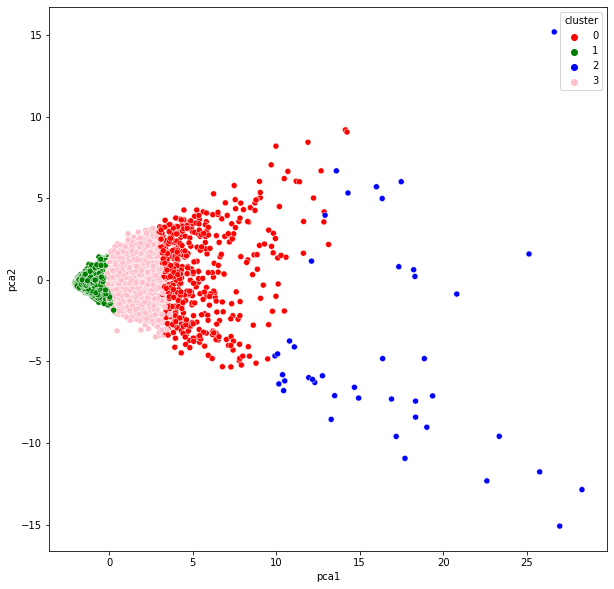

In [67]:
plt.figure(figsize=(10,10))
sns.scatterplot(x = 'pca1', y = 'pca2', hue = 'cluster', data = pca_df, palette = ['red', 'green', 'blue', 'pink'])

In [68]:
df_cluster_ordered = df_cluster_at.sort_values(by = 'cluster')
df_cluster_ordered.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
4632,4768.062736,1.0,374.81,333.20,41.61,9917.639168,0.333333,0.250000,0.083333,0.833333,18,4,7000.0,5283.297064,1589.293892,0.000000,12,0
441,7386.704481,0.9,0.00,0.00,0.00,10713.874600,0.000000,0.000000,0.000000,0.400000,14,0,10500.0,7566.577763,1943.431564,0.100000,10,0
1759,5383.084424,1.0,9736.61,3684.52,6052.09,2965.656802,1.000000,0.416667,1.000000,0.250000,7,135,9000.0,15824.735870,3364.021248,0.083333,12,0
5018,9309.635579,1.0,9007.67,8775.37,232.30,0.000000,1.000000,1.000000,0.250000,0.000000,0,87,15000.0,5528.180381,2618.776868,0.000000,12,0
6788,3447.523748,1.0,6341.55,3232.26,3109.29,2307.775197,1.000000,0.750000,1.000000,0.500000,12,118,5000.0,5575.894258,1767.825544,0.000000,12,0


In [69]:
df_cluster_ordered.tail()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
1721,2288.014844,1.000000,1753.46,1753.46,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,50,2500.0,989.999739,1121.296235,0.0,12,3
1720,5239.120768,1.000000,1823.23,1823.23,0.00,0.000000,0.750000,0.750000,0.000000,0.000000,0,14,5750.0,2107.740768,2658.139243,0.0,12,3
6829,1456.530313,0.909091,210.09,128.40,81.69,1785.865160,0.363636,0.363636,0.272727,0.363636,26,9,2000.0,423.100779,628.099733,0.0,11,3
6818,300.119490,1.000000,2811.86,2006.80,805.06,0.000000,1.000000,0.916667,0.583333,0.000000,0,51,800.0,2501.680369,189.395585,1.0,12,3
8949,372.708075,0.666667,1093.25,1093.25,0.00,127.040008,0.666667,0.666667,0.000000,0.333333,2,23,1200.0,63.165404,88.288956,0.0,6,3


In [74]:
# df_cluster_ordered.to_csv('cluster_ordereded.csv')